# **SATISFACCIÓN DE LOS PASAJEROS EN UN VUELO DE AVIÓN**

# VARIABLES

**Gender:** male or female

**Customer type:** regular or non-regular airline customer

**Age:** the actual age of the passenger

**Type of travel:** the purpose of the passenger's flight (personal or business travel)

**Class:** business, economy, economy plus

**Flight distance**

**Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)

**Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)

**Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)

**Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)

**Food and drink:** food and drink satisfaction level (0: not rated; 1-5)

**Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)

**Seat comfort:** seat satisfaction level (0: not rated; 1-5)

**Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)

**On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)

**Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)

**Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)

**Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)

**Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)

**Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)

**Departure delay in minutes**

**Arrival delay in minutes**

**satisfaction**: satisfaction/ neutral or dissatisfied

## OBJETIVO: Predecir si los clientes estan o no satisfechos con las condiciones del vuelo

- **IMPORTAR LIBRERIAS Y LEER EL DATASET**

In [556]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as ms

In [557]:
data = pd.read_csv('./train.csv')

- **DATA ANALYSIS DEL DATASET**

In [558]:
data.shape

(103904, 25)

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

- Información variables numéricas

In [560]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [561]:
data.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


- Pasamos todas las columnas a minúsculas para facilitar el análisis

In [562]:
data.columns=[e.lower() for e in data.columns]
data.columns

Index(['unnamed: 0', 'id', 'gender', 'customer type', 'age', 'type of travel',
       'class', 'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

- Información sobre las variables categóricas

In [563]:
cat_cols = [col for col in data.columns if (data[col].dtype==object)]     

In [564]:
print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print(f'Name: {data[c].name}')    # column name
    print(f'Type: {data[c].dtype}')   # column type
    print(f'Unique values: {len(data[c].unique())}')   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 5
----------
Name: gender
Type: object
Unique values: 2
['Male' 'Female']
Female    50.745881
Male      49.254119
Name: gender, dtype: float64

----------
Name: customer type
Type: object
Unique values: 2
['Loyal Customer' 'disloyal Customer']
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: customer type, dtype: float64

----------
Name: type of travel
Type: object
Unique values: 2
['Personal Travel' 'Business travel']
Business travel    68.962696
Personal Travel    31.037304
Name: type of travel, dtype: float64

----------
Name: class
Type: object
Unique values: 3
['Eco Plus' 'Business' 'Eco']
Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: class, dtype: float64

----------
Name: satisfaction
Type: object
Unique values: 2
['neutral or dissatisfied' 'satisfied']
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

----------


In [565]:
data.columns

Index(['unnamed: 0', 'id', 'gender', 'customer type', 'age', 'type of travel',
       'class', 'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [566]:
data.head(5)

,unnamed: 0,id,gender,customer type,age,type of travel,class,flight distance,inflight wifi service,departure/arrival time convenient,...,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,departure delay in minutes,arrival delay in minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


- Eliminamos las columnas 'Unnamed 0' y 'id' porque no nos interesan en el análisis

In [567]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type of travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight distance                    103904 non-null  int64  
 6   inflight wifi service              103904 non-null  int64  
 7   departure/arrival time convenient  103904 non-null  int64  
 8   ease of online booking             103904 non-null  int64  
 9   gate location                      103904 non-null  int64  
 10  food and drink                     103904 non-null  int64  
 11  online boarding                    1039

- **NULL VALUES**

In [570]:
nulls = pd.DataFrame(data.isna().sum()/len(data))

In [571]:
nulls= nulls.reset_index()

- Vemos cuantos nulls hay en cada variable (%)

In [572]:
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
21,arrival delay in minutes,0.002984
0,gender,0.000000
12,seat comfort,0.000000
20,departure delay in minutes,0.000000
19,cleanliness,0.000000
18,inflight service,0.000000
17,checkin service,0.000000
16,baggage handling,0.000000
15,leg room service,0.000000
14,on-board service,0.000000


- Visualización de nulls

<AxesSubplot:>

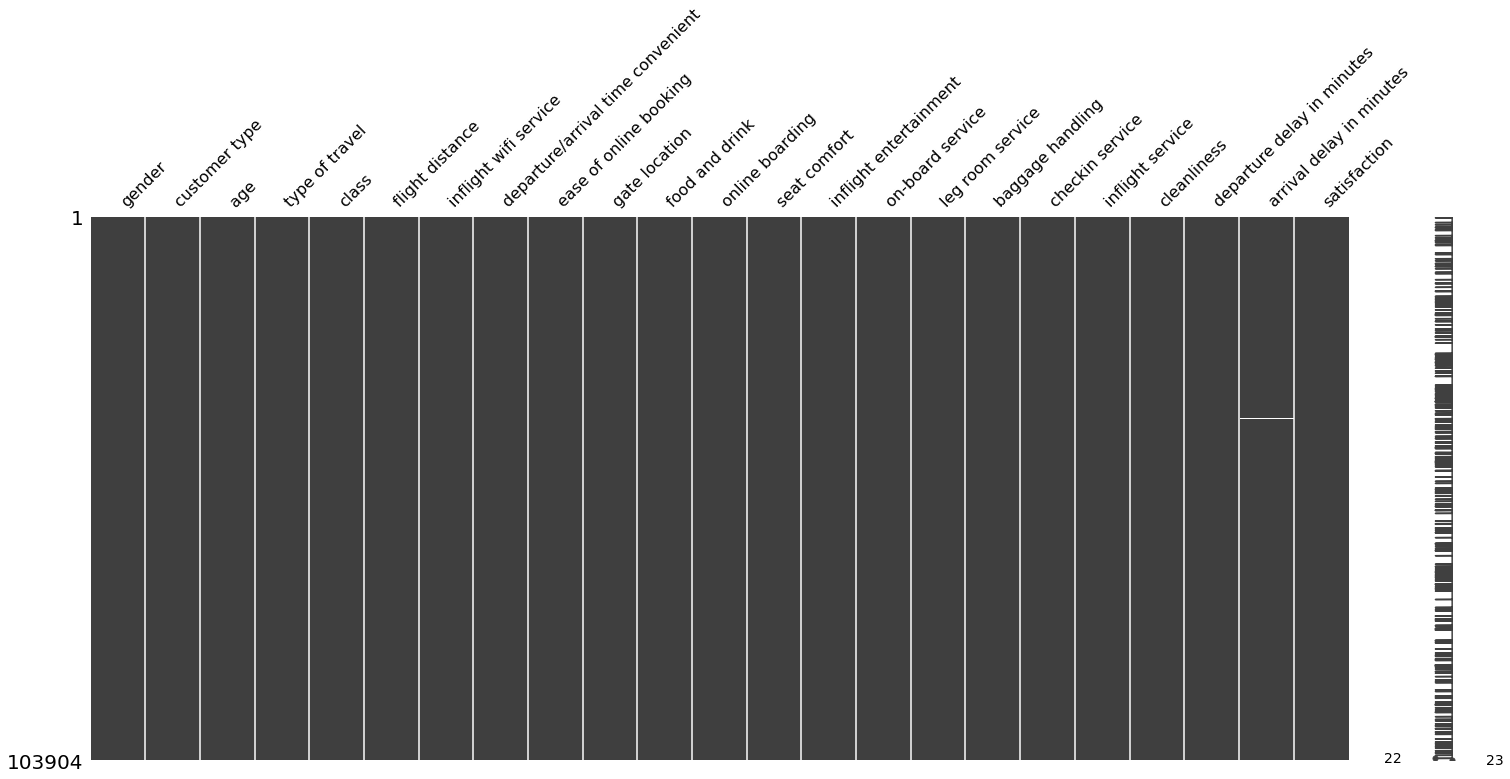

In [574]:
msno.matrix(data)

In [575]:
data.isna().sum()

gender                                 0
customer type                          0
age                                    0
type of travel                         0
class                                  0
flight distance                        0
inflight wifi service                  0
departure/arrival time convenient      0
ease of online booking                 0
gate location                          0
food and drink                         0
online boarding                        0
seat comfort                           0
inflight entertainment                 0
on-board service                       0
leg room service                       0
baggage handling                       0
checkin service                        0
inflight service                       0
cleanliness                            0
departure delay in minutes             0
arrival delay in minutes             310
satisfaction                           0
dtype: int64

- Al ser un % tan bajo, comprobamos si es mejor rellenar estos nulls con la media o la mediana

<AxesSubplot:xlabel='arrival delay in minutes', ylabel='Density'>

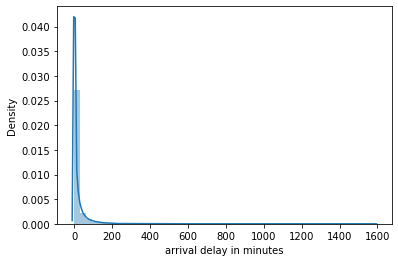

In [576]:
points2 = data['arrival delay in minutes'].fillna(np.mean(data['arrival delay in minutes']))
sns.distplot(points2)

In [577]:
median = np.median(data['arrival delay in minutes'].fillna(0))

<AxesSubplot:xlabel='arrival delay in minutes', ylabel='Density'>

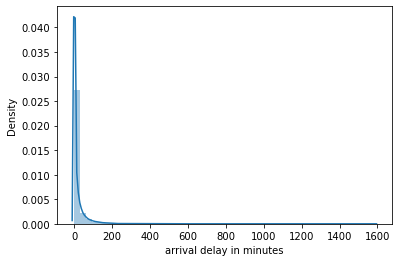

In [578]:
points = data['arrival delay in minutes'].fillna(median)
sns.distplot(points)

- Se trata de una distribución muy asimétrica hacia la derecha, por tanto, rellenamos los nulls con la mediana al ser una medida más robusta que la media

In [579]:
data['arrival delay in minutes'].fillna(data['arrival delay in minutes'].median(axis = 0), inplace = True)

In [580]:
data.isna().sum()

gender                               0
customer type                        0
age                                  0
type of travel                       0
class                                0
flight distance                      0
inflight wifi service                0
departure/arrival time convenient    0
ease of online booking               0
gate location                        0
food and drink                       0
online boarding                      0
seat comfort                         0
inflight entertainment               0
on-board service                     0
leg room service                     0
baggage handling                     0
checkin service                      0
inflight service                     0
cleanliness                          0
departure delay in minutes           0
arrival delay in minutes             0
satisfaction                         0
dtype: int64

- **OUTLIERS**

- Información estadística sobre las variables

In [584]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category' and 'object']

In [585]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,flight distance,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,departure delay in minutes,arrival delay in minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- Visualización de los outliers

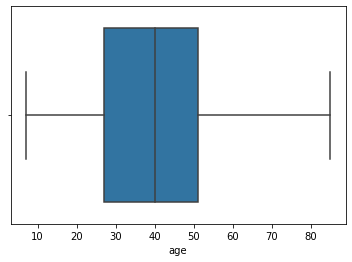

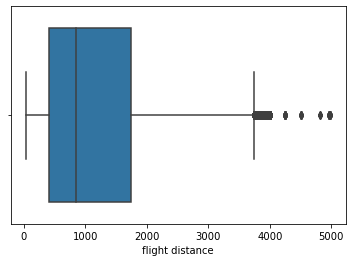

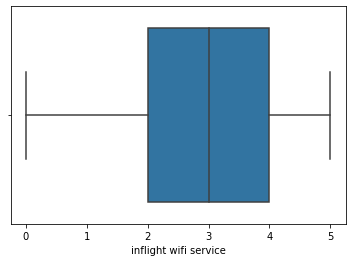

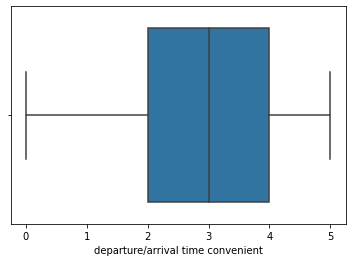

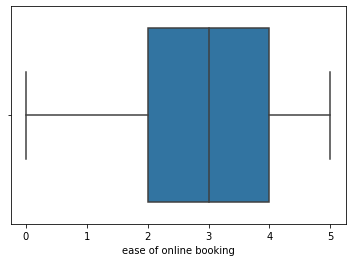

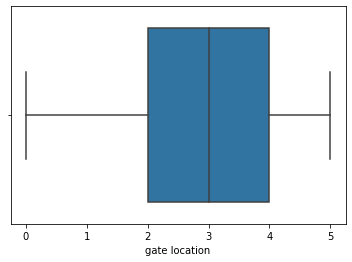

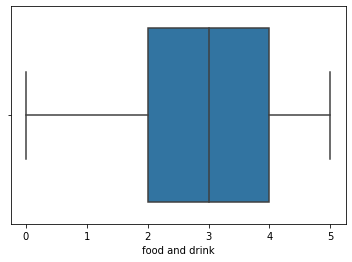

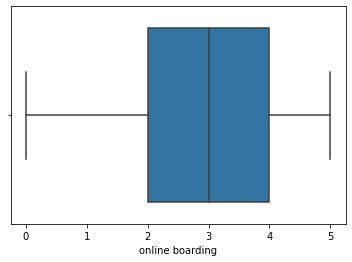

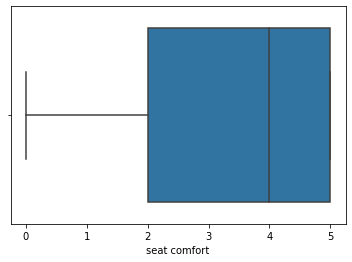

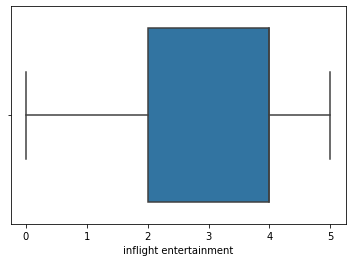

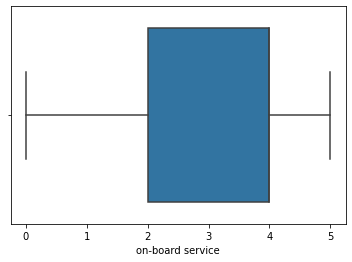

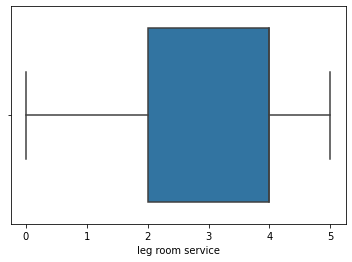

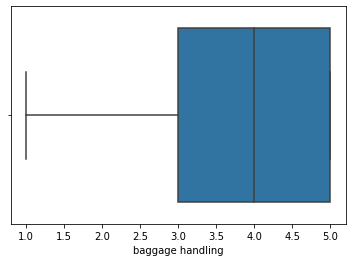

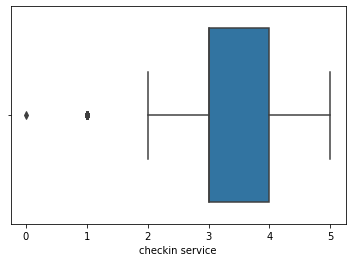

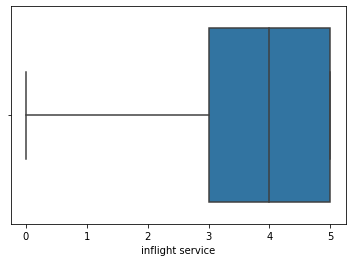

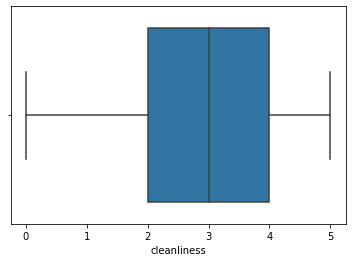

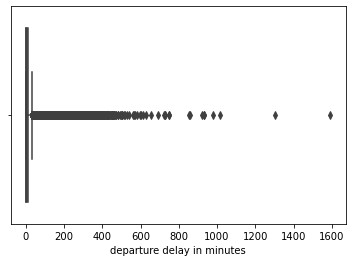

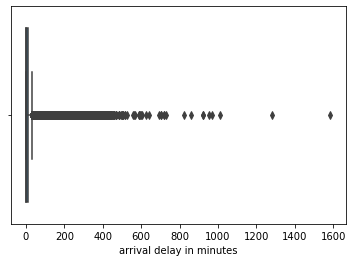

In [586]:
for col in numericals.columns:
    sns.boxplot(numericals[col])
    plt.show()

En base a esta visualización gráfica se considera que no es necesario eliminar los outliers del dataset ya que las variables que más outliers contienen son importantes y, por tanto, nos interesa mantenerlos para la predicción del modelo. Por ejemplo, en el caso de **flight distance**, los outliers se encuentran entre 4000 y 5000km, teniendo en cuenta la escala del dataset, no son tantos km como para tenerlos en consideración y tener que eliminarlos.

- **VISUALIZACIONES**

- Visualización variables numéricas

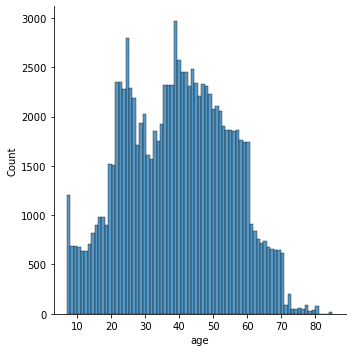

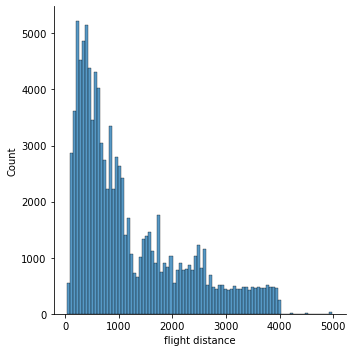

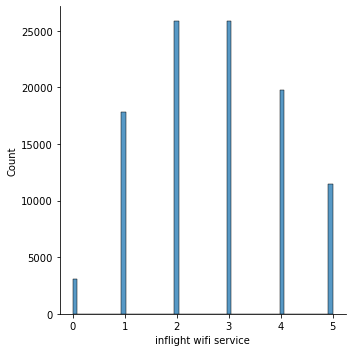

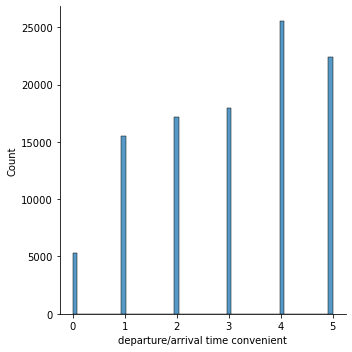

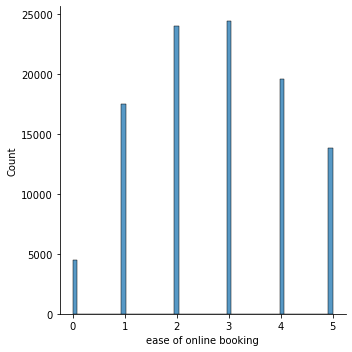

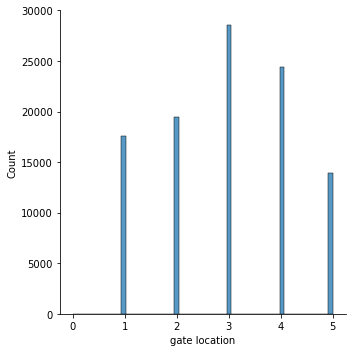

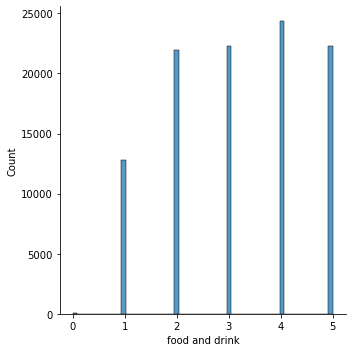

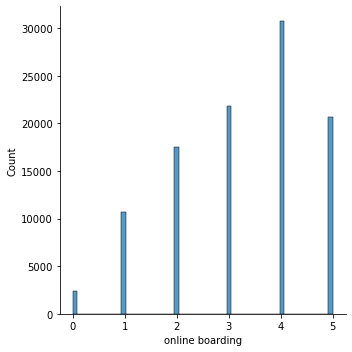

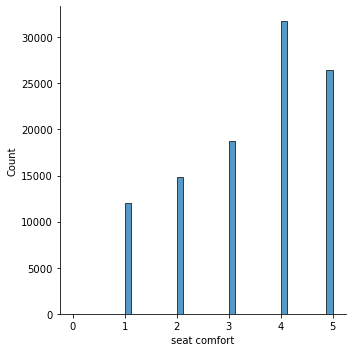

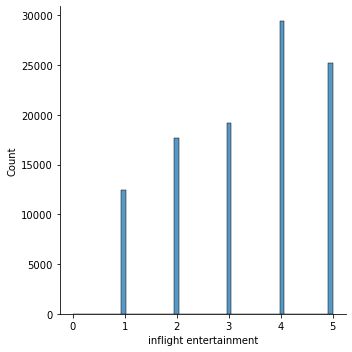

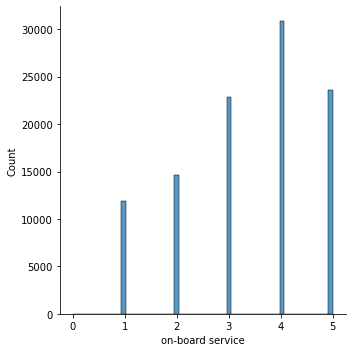

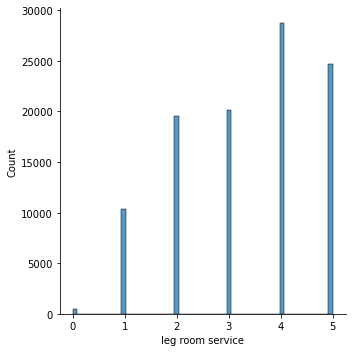

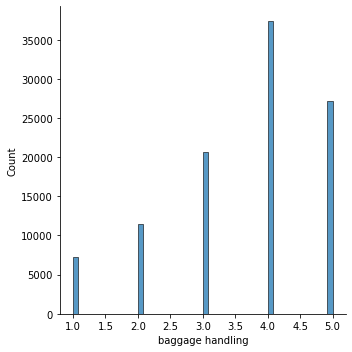

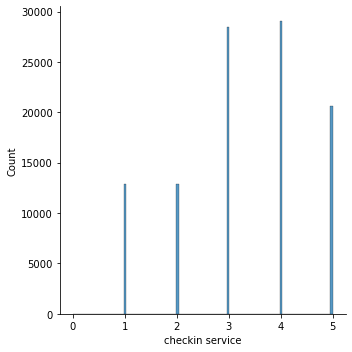

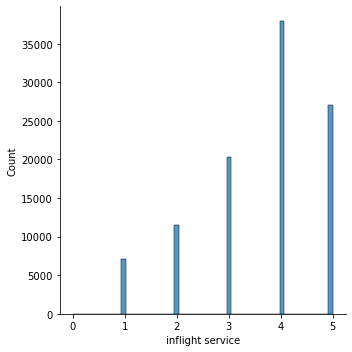

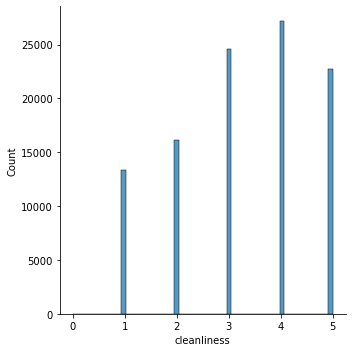

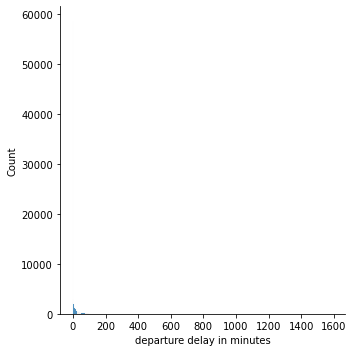

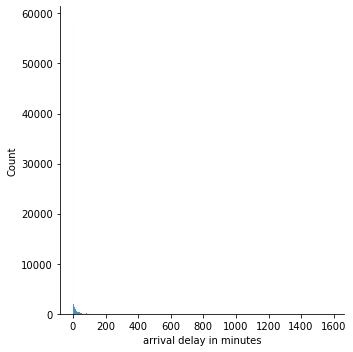

In [587]:
numericals = data.select_dtypes(np.number)
for col in numericals.columns:
    sns.displot(numericals[col])
    plt.show()

- Visualización variables categóricas

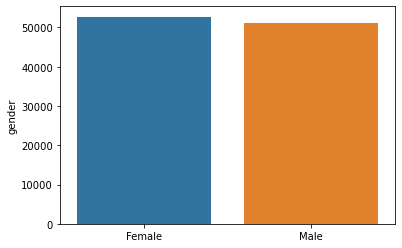

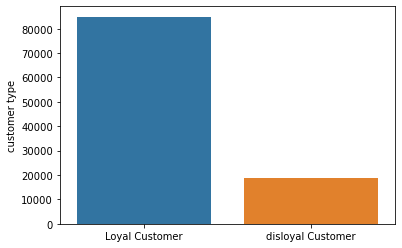

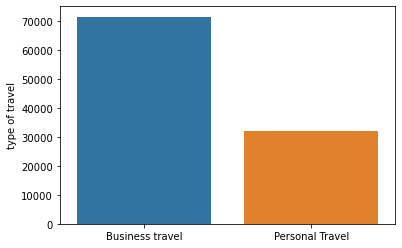

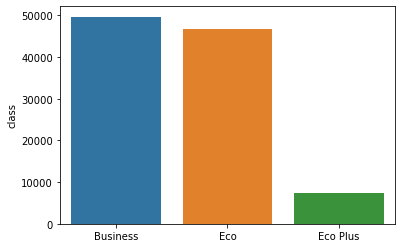

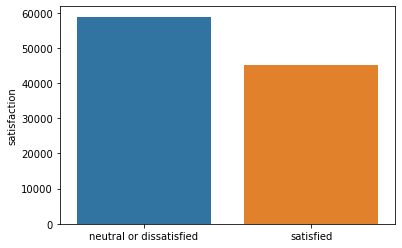

In [588]:
categoricals = data.select_dtypes(np.object)
for col in categoricals.columns:
    sns.barplot(x = categoricals[col].value_counts().index, y = categoricals[col].value_counts())
    plt.show()

- Visualización por variable (categóricas) 

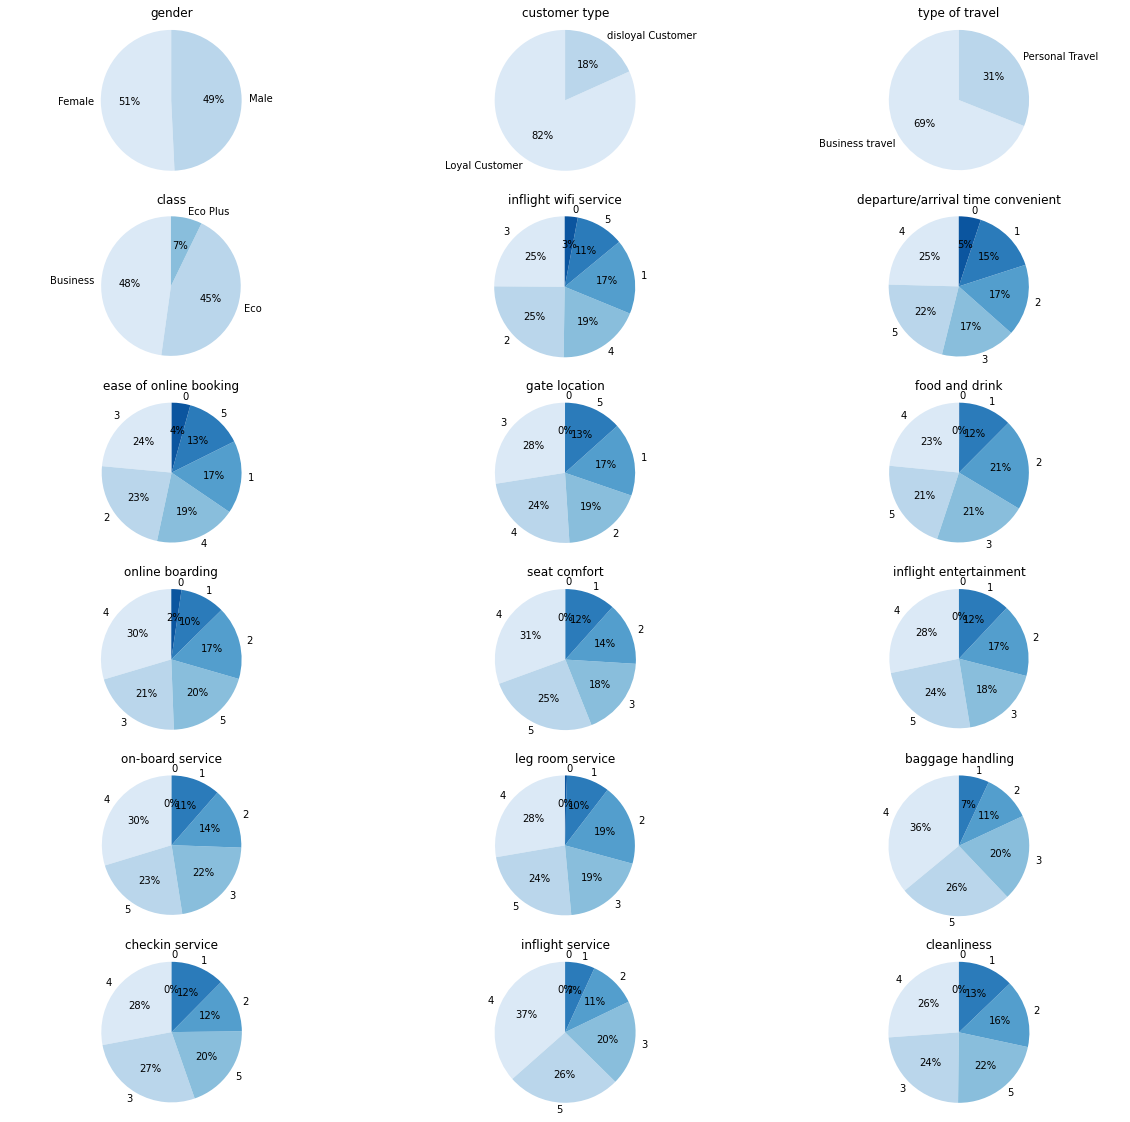

In [589]:
categorical = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categorical.columns):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Blues"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

In [590]:
satisf_gender = data.groupby(['gender', 'satisfaction']).size()
satisf_gender

gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
dtype: int64

**Conclusiones principales de las visualizaciones previas**

- El número de mujeres y hombres es muy similar
- La mayoría de clientes son leales y repetirían con la aerolínea
- La mayoría de viajes se realizan por razones de trabajo
- La clase en la que viajan los usuarios se reparte principalmente entre business y eco
- Las variables que generan más satisfacción a los clientes son: **seat confort, inflight entertainment, on-board service, leg room service y baggage handling**

- Relación entre distintas variables

<AxesSubplot:xlabel='flight distance', ylabel='Count'>

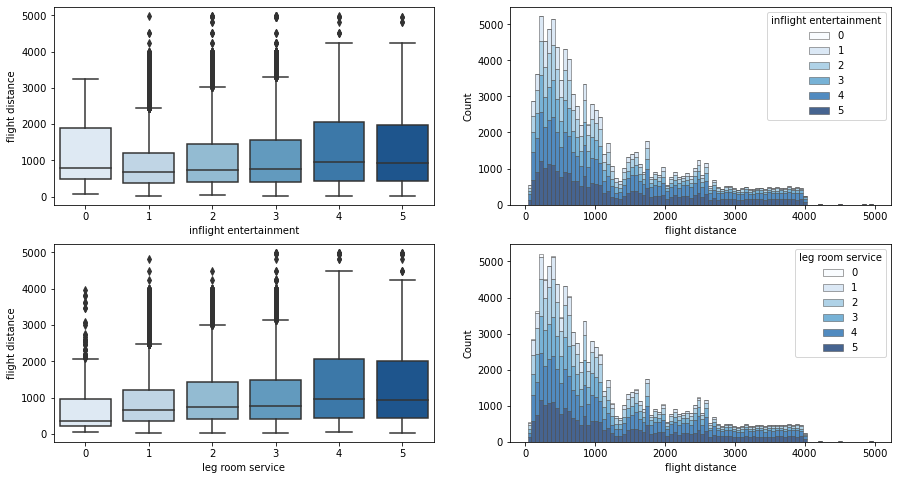

In [591]:
#Leg room service y Inflight entertainment vs Flight Distance
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "inflight entertainment", y = "flight distance", palette = "Blues", data = data, ax = ax[0, 0])
sns.histplot(data, x = "flight distance", hue = "inflight entertainment", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "leg room service", y = "flight distance", palette = "Blues", data = data, ax = ax[1, 0])
sns.histplot(data, x = "flight distance", hue = "leg room service", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

<AxesSubplot:xlabel='flight distance', ylabel='Count'>

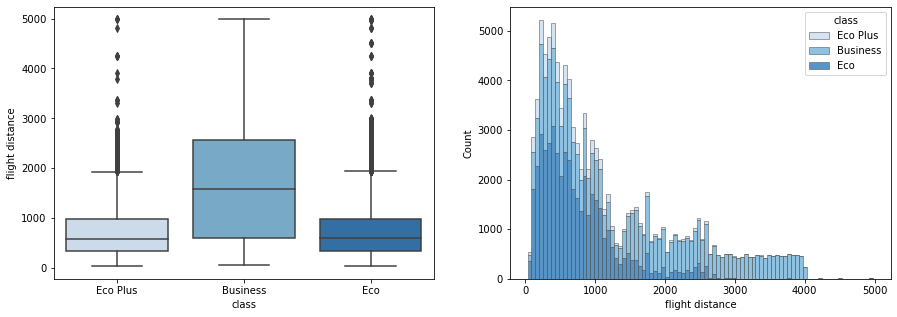

In [592]:
#Class vs flight distance
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "flight distance", palette = "Blues", data = data, ax = ax[0])
sns.histplot(data, x = "flight distance", hue = "class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

En las visualizaciones anteriores se puede apreciar que cuanto más largo es el vuelo, más peso en cuanto a la satisfacción ganan variables como el entretenimiento en el avión, el espacio entre las piernas para viajar más cómodo y/o el tipo de clase en la que se viaja, siendo business la más escogida debido a los mejores beneficios que se proporcionan a los usuarios durante los vuelos

<AxesSubplot:xlabel='age', ylabel='Count'>

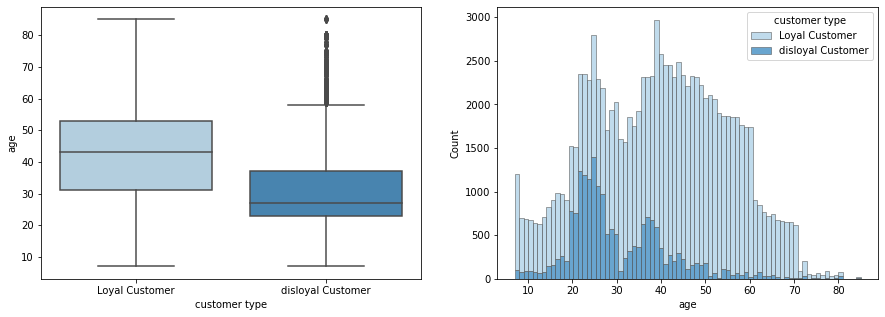

In [593]:
#Customer Type vs Age
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "customer type", y = "age", palette = "Blues", data = data, ax = ax[0])
sns.histplot(data, x = "age", hue = "customer type", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

Aquí se puede apreciar que la media de edad de los clientes más leales se comprende en el rango de entre los 30-50 años, mientras que los clientes menos leales son los del rango de edad de entre 25-35 años.

<AxesSubplot:xlabel='age', ylabel='Count'>

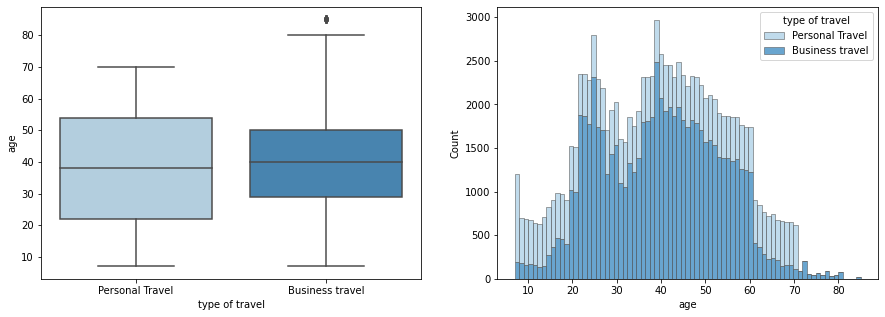

In [594]:
#Type of Travel vs Age
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "type of travel", y = "age", palette = "Blues", data = data, ax = ax[0])
sns.histplot(data, x = "age", hue = "type of travel", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='age', ylabel='Count'>

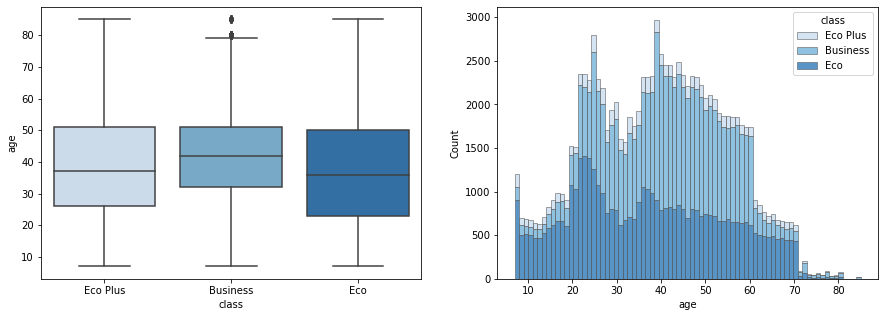

In [595]:
#Class vs Age
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "age", palette = "Blues", data = data, ax = ax[0])
sns.histplot(data, x = "age", hue = "class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

En esta gráfica se puede observar que la mayoría de gente que viaja en Business class son adultos de entre 35-50 años y, en la gráfica anterior a esta, vemos que la mayoría de viajes por razones de trabajo los realizan también adultos de 35-50 años. Es decir, se puede decir que la mayoría de personas que viajan por razones de trabajo y que se encuentran dentro del rango de edad de 35-50 años, viajan con Business class.

- Relación variable 'Satisfaction' con las otras variables categóricas

([<matplotlib.patches.Wedge at 0x2239d2fbd60>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'satisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'neutral/dissatisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

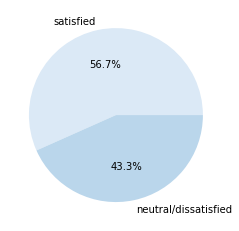

In [596]:
plt.pie(data.satisfaction.value_counts(), labels = ["satisfied", "neutral/dissatisfied"], colors = sns.color_palette("Blues"), autopct = '%1.1f%%')

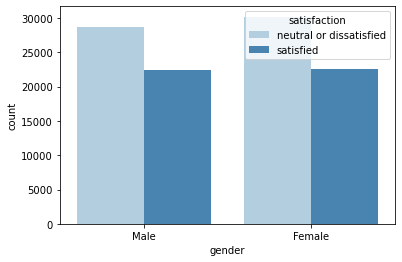

In [597]:
sns.countplot(x = 'gender', hue = 'satisfaction', palette = "Blues", data = data)
plt.show()

La proporción de clientes satisfechos/no satisfechos varia muy poco entre géneros

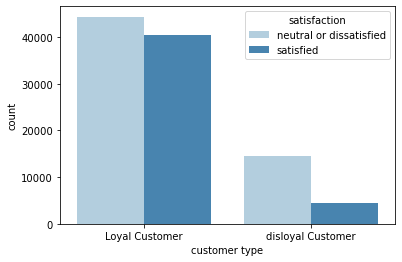

In [598]:
sns.countplot(x = 'customer type', hue = 'satisfaction', palette = "Blues", data = data)
plt.show()

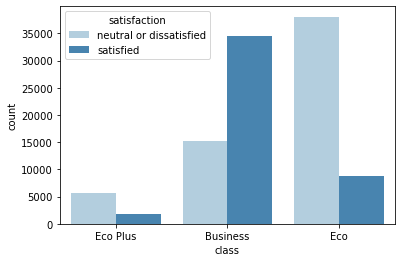

In [599]:
sns.countplot(x = 'class', hue = 'satisfaction', palette = "Blues", data = data)
plt.show()

Aquí se puede observar que la mayoría de usuarios que vuelan en 'economy' o en 'economy plus' no están satisfechos con el vuelo y, en cambio, aquellos que vuelan con business, están muy satisfechos (probablemente debido a que pagan un plus por tener más beneficios dentro del vuelo generando al usuario una mejor satisfacción de su experiencia).

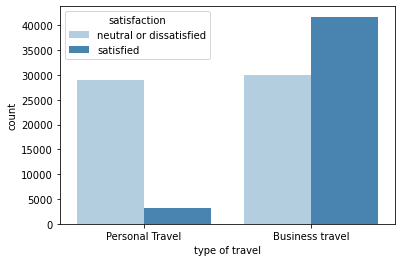

In [600]:
sns.countplot(x = 'type of travel', hue = 'satisfaction', palette = "Blues", data = data)
plt.show()

En general, los usuarios que vuelan por motivos de laborales están un más satisfechos con el vuelo que los que viajan por motivos personales, debido a que los usuarios que los que viajan por trabajo vuelan, normalmente, en business (almenos los adultos de entre 35-50 años como se ha visto anteriormente)

- **TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS**

In [601]:
data['gender'][0] == 'Male'

True

- Transformamos variables categóricas

In [602]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1

def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

In [603]:
def process_data(df):
    data['gender'] = df['gender'].apply(transform_gender)
    data['customer type'] = df['customer type'].apply(transform_customer_type)
    data['type of travel'] = df['type of travel'].apply(transform_travel_type)
    data['class'] = df['class'].apply(transform_class)
    data['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    
    return df

In [604]:
data = process_data(data)

- Comprobamos que ha funcionado

In [605]:
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [606]:
data['type of travel'].unique()

array([0, 1], dtype=int64)

In [607]:
data['class'].unique()

array([1, 2, 0], dtype=int64)

In [608]:
data['customer type'].unique()

array([1, 0], dtype=int64)

- **CORRELACIÓN**

- Realizamos una matriz de correlación para comprobar las correlación entre variables

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  int64  
 1   customer type                      103904 non-null  int64  
 2   age                                103904 non-null  int64  
 3   type of travel                     103904 non-null  int64  
 4   class                              103904 non-null  int64  
 5   flight distance                    103904 non-null  int64  
 6   inflight wifi service              103904 non-null  int64  
 7   departure/arrival time convenient  103904 non-null  int64  
 8   ease of online booking             103904 non-null  int64  
 9   gate location                      103904 non-null  int64  
 10  food and drink                     103904 non-null  int64  
 11  online boarding                    1039

<AxesSubplot:>

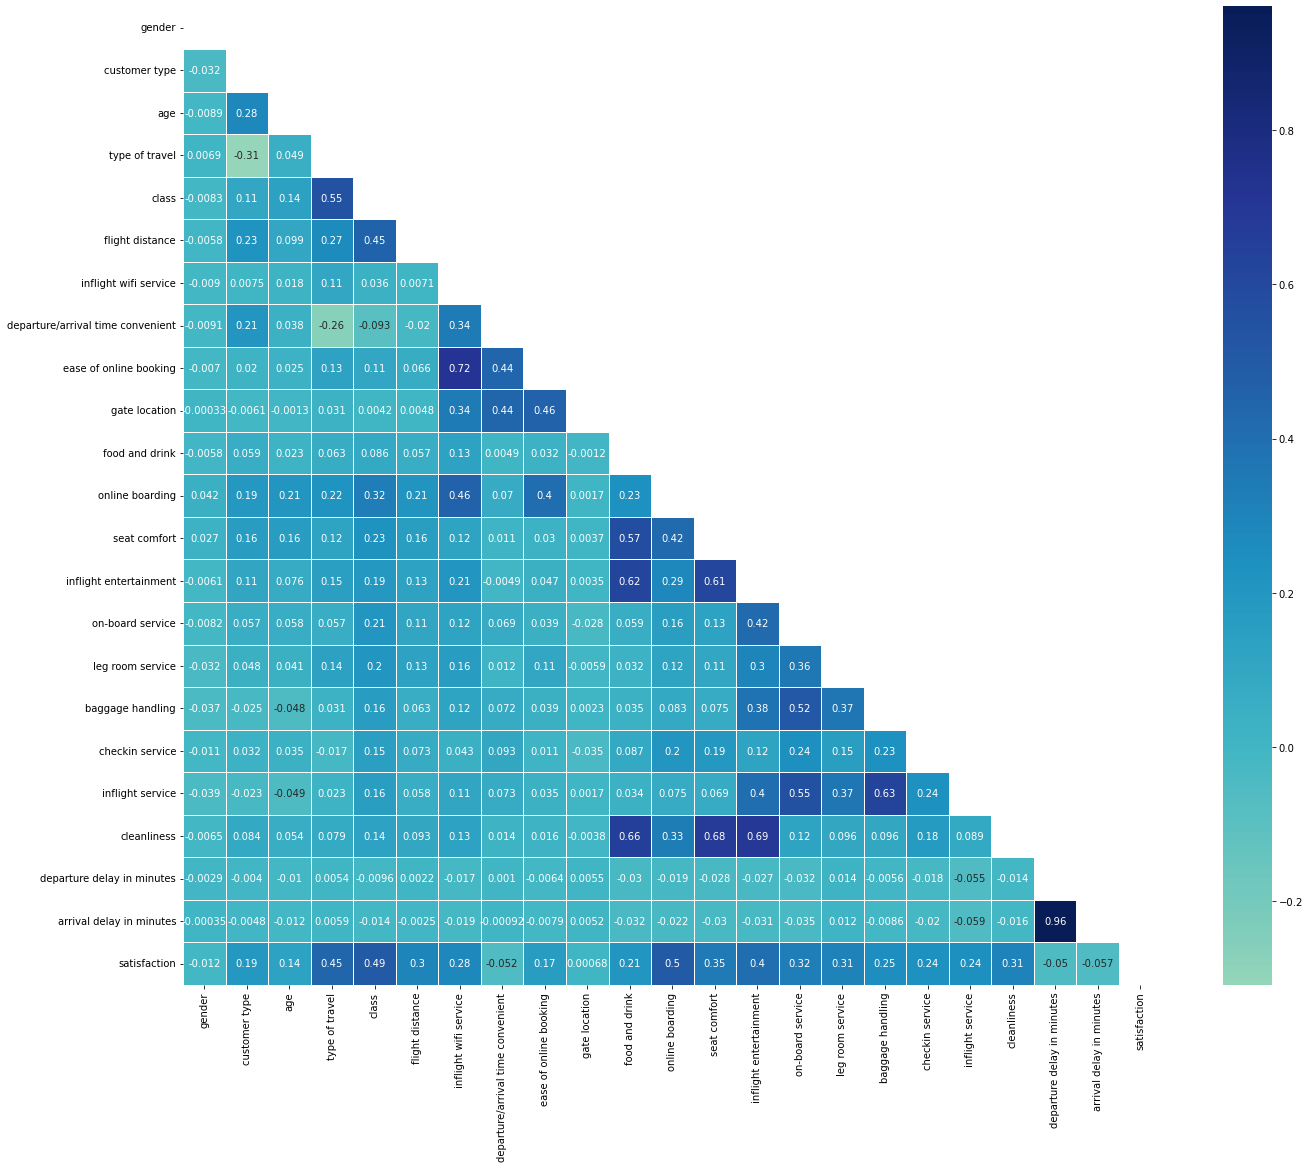

In [610]:
corr_matrix = data.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22, 18))

sns.heatmap(corr_matrix, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [618]:
import plotly.express as px
plt.figure()
px.scatter(data, x='arrival delay in minutes', y='departure delay in minutes', marginal_x='histogram', marginal_y='histogram')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['gender', 'customer type', 'age', 'type of travel', 'class', 'flight distance', 'inflight wifi service', 'departure/arrival time convenient', 'ease of online booking', 'gate location', 'food and drink', 'online boarding', 'seat comfort', 'inflight entertainment', 'on-board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness', 'departure delay in minutes', 'satisfaction'] but received: arrival delay in minutes

<Figure size 432x288 with 0 Axes>

In [612]:
rfc.feature_importances_

array([0.00467312, 0.03712478, 0.03245469, 0.0956955 , 0.09570679,
       0.03589759, 0.14158399, 0.01637359, 0.03689469, 0.01651903,
       0.01220788, 0.18434165, 0.04591976, 0.05476479, 0.03281995,
       0.03921261, 0.02376868, 0.02345205, 0.02210907, 0.02475305,
       0.01118135, 0.01254537])

Una vez hecha la matriz de correlación, comprobamos la relación entre variables y eliminamos las menos interesantes para la predicción del modelo. 

En este caso, he cogido las 3 variables menos correlacionadas en base a la variable que se quiere predecir (satisfacción):
 - Arrival delay in minutes
 - Departure/arrival time convenient
 - Departure delay in minutes
 
Y he realizado la función 'feature_importances' del modelo Random Forests ya que, a priori, es el que me daba una mejor predicción. De los resultados, he cogido también los 3 valores más bajos que corresponden con las siguientes variables:
- Gender
- Arrival delay in minutes
- Food and drink

Finalmente, he eliminado las que coincidian en ambos casos. En este caso, solo eliminamos la columna 'arrival delay in minutes' porque es la menos correlacionada con 'satisfaction' y la que genera más ruido en la predicción del modelo.

In [613]:
data = data.drop(columns=['arrival delay in minutes'], axis=1)

In [614]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   gender                             103904 non-null  int64
 1   customer type                      103904 non-null  int64
 2   age                                103904 non-null  int64
 3   type of travel                     103904 non-null  int64
 4   class                              103904 non-null  int64
 5   flight distance                    103904 non-null  int64
 6   inflight wifi service              103904 non-null  int64
 7   departure/arrival time convenient  103904 non-null  int64
 8   ease of online booking             103904 non-null  int64
 9   gate location                      103904 non-null  int64
 10  food and drink                     103904 non-null  int64
 11  online boarding                    103904 non-null  int64
 12  se

- Realizamos una segunda matriz de correlación menos confusa (sin valores exactos)


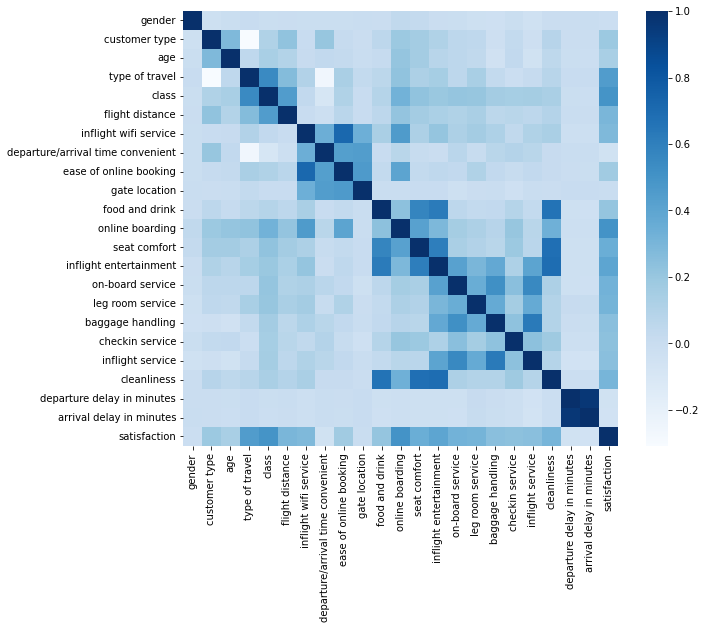

In [619]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, square = True, cmap = 'Blues')
plt.show()

In [620]:
data.describe()

,gender,customer type,age,type of travel,class,flight distance,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,...,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,departure delay in minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.507459,0.817322,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1.000000


- **RELIZACIÓN DE LOS MODELOS DE CLASIFICACIÓN**

- Separamos en train/test

In [621]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model

In [622]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                data.drop('satisfaction', axis=1),
                data['satisfaction'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (83123, 21)
Shape of test set: (20781, 21)


- Normalizamos

In [623]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Empezamos los distintos modelos seleccionados (6) y analizamos los resultados en base a la **accuracy**

- **Logistic Regression**

In [624]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

In [625]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[10592  1121]
 [ 1457  7611]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11713
           1       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [626]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.8759443722631249


- **K Nearest Neighbours**

In [627]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
predictions2 = knc.predict(X_test)

In [628]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))

Confusion Matrix: 
 [[11428   285]
 [ 1242  7826]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11713
           1       0.96      0.86      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [629]:
knc_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knc_acc)

Accuracy of K Neighbors Classifier Model is:  0.9265194167749387


- **Random Forest Classifier**

In [630]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [631]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[11492   221]
 [  548  8520]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [632]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9629950435493961


- **Support Vector Machines (SVC)**

In [635]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [636]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[11363   350]
 [  603  8465]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [637]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.954140801693855


- **Ada Boost Classifier**

In [638]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

predictions6 = ada.predict(X_test)

In [639]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions6))
print("\n")
print(classification_report(y_test, predictions6))

Confusion Matrix: 
 [[11048   665]
 [  820  8248]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.93      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [640]:
ada_acc = accuracy_score(y_test, predictions6)
print("Accuracy of ADA model is: ", ada_acc)

Accuracy of ADA model is:  0.9285404937202252


- **Gradient boost classifier**

In [641]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)
predictions7 = gbt.predict(X_test)

In [642]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions7))
print("\n")
print(classification_report(y_test, predictions7))

Confusion Matrix: 
 [[11228   485]
 [  751  8317]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.94      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [643]:
gbt_acc = accuracy_score(y_test, predictions7)
print("Accuracy of GBT model is: ", gbt_acc)

Accuracy of GBT model is:  0.9405225927529955


- **Resum accuracy todos los modelos**

In [644]:
print(logreg_acc)
print(knc_acc)
print(rfc_acc)
print(svm_acc)
print(ada_acc)
print(gbt_acc)

0.8759443722631249
0.9265194167749387
0.9629950435493961
0.954140801693855
0.9285404937202252
0.9405225927529955


- **CONCLUSIONES**

In [ ]:
- El número de hombres y mujeres es muy similar
- 